<a href="https://colab.research.google.com/github/cevitaufik/Belajar-Pengembangan-Machine-Learning/blob/main/Membuat_model_NLP_dengan_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Memprediksi kategori berita berdasarkan isi berintanya.**
<hr>
<br>
Nama : Cevi Taufik <br>
Email&ensp;: cevitaufik@gmail.com

In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
 import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/sample/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='category')
df_new

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [ ]:
text = df_new['text'].values
category = df_new[['business', 'entertainment','politics', 'sport', 'tech']].values

In [ ]:
from sklearn.model_selection import train_test_split
text_latih, text_test, category_latih, category_test = train_test_split(text, category, test_size=0.2)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
targetAccuracy = 0.93

class clbk(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > targetAccuracy):
      print("\nTarget akurasi telah tercapai!")
      self.model.stop_training = True
callback = clbk()

In [ ]:
epoch = 30
batch = 128
history = model.fit(
    padded_latih,
    category_latih,
    batch_size=batch,
    epochs=epoch,
    callbacks=[callback], 
    validation_data=(padded_test, category_test), verbose=2)

Epoch 1/30
14/14 - 78s - loss: 1.6054 - accuracy: 0.2466 - val_loss: 1.6067 - val_accuracy: 0.2000
Epoch 2/30
14/14 - 75s - loss: 1.5902 - accuracy: 0.2573 - val_loss: 1.5860 - val_accuracy: 0.2854
Epoch 3/30
14/14 - 86s - loss: 1.4371 - accuracy: 0.3742 - val_loss: 1.3396 - val_accuracy: 0.4225
Epoch 4/30
14/14 - 79s - loss: 1.5541 - accuracy: 0.3781 - val_loss: 1.5438 - val_accuracy: 0.2607
Epoch 5/30
14/14 - 79s - loss: 1.4744 - accuracy: 0.3961 - val_loss: 1.4637 - val_accuracy: 0.4315
Epoch 6/30
14/14 - 79s - loss: 1.2776 - accuracy: 0.5725 - val_loss: 1.2443 - val_accuracy: 0.5079
Epoch 7/30
14/14 - 80s - loss: 0.9593 - accuracy: 0.6556 - val_loss: 1.0732 - val_accuracy: 0.5596
Epoch 8/30
14/14 - 79s - loss: 0.7188 - accuracy: 0.7236 - val_loss: 0.9719 - val_accuracy: 0.6360
Epoch 9/30
14/14 - 79s - loss: 0.4992 - accuracy: 0.8466 - val_loss: 0.8932 - val_accuracy: 0.7146
Epoch 10/30
14/14 - 79s - loss: 0.2829 - accuracy: 0.9281 - val_loss: 0.8266 - val_accuracy: 0.7551
Epoch 11/

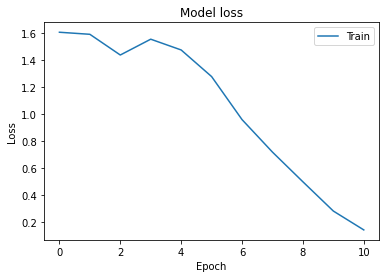

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

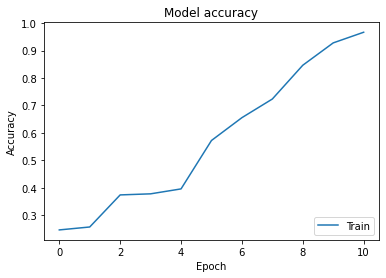

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()